In [126]:
import pandas as pd
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge

In [127]:
hpi = pd.read_csv(f'C:/Users/Aryansh Shukla/Downloads/archive (1)/Home-Price-Index.csv')
hpi.head()

,DATE,CSUSHPISA
0,1987-01-01,63.964
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563


In [128]:
cpi = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/Consumer-Price-Index.csv")
cpi.head()

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [129]:
fed = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/FedFunds.csv")
fed

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
826,2023-05-01,5.06
827,2023-06-01,5.08
828,2023-07-01,5.12
829,2023-08-01,5.33


In [130]:
gdp = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/GDP.csv")
gdp

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
302,2022-07-01,25994.639
303,2022-10-01,26408.405
304,2023-01-01,26813.601
305,2023-04-01,27063.012


In [131]:
mortgage = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/Mortgage.csv")
mortgage

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29
...,...,...
2739,2023-09-28,7.31
2740,2023-10-05,7.49
2741,2023-10-12,7.57
2742,2023-10-19,7.63


In [132]:
unemployment = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/Unemployment-Rate.csv")
unemployment

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
904,2023-05-01,3.7
905,2023-06-01,3.6
906,2023-07-01,3.5
907,2023-08-01,3.8


In [133]:
population = pd.read_csv(f"C:/Users/Aryansh Shukla/Downloads/archive (1)/Population-Growth.csv")
population

,DATE,SPPOPGROWUSA
0,1961-01-01,1.657730
1,1962-01-01,1.537997
2,1963-01-01,1.439165
3,1964-01-01,1.389046
4,1965-01-01,1.250172
...,...,...
57,2018-01-01,0.526435
58,2019-01-01,0.455381
59,2020-01-01,0.964348
60,2021-01-01,0.156747


In [134]:
def clean_df(df, date_col, value_col, new_col_name):
    df = df[[date_col, value_col]].copy()
    df.columns = ['Date', new_col_name]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

In [135]:
hpi = clean_df(hpi, 'DATE', 'CSUSHPISA', 'Home Price Index')

In [136]:
cpi = clean_df(cpi, 'DATE', 'CPIAUCSL', 'CPI')

In [137]:
fed = clean_df(fed, 'DATE', 'FEDFUNDS', 'Fed Funds Rate')

In [138]:
gdp = clean_df(gdp, 'DATE', 'GDP', 'GDP')

In [139]:
mortgage = clean_df(mortgage, 'DATE', 'MORTGAGE30US', 'Mortgage Rate')

In [140]:
unemployment = clean_df(unemployment, 'DATE', 'UNRATE', 'Unemployment Rate')

In [141]:
population = clean_df(population, 'DATE', 'SPPOPGROWUSA', 'Population Growth')

In [142]:
dfs = [hpi, cpi, fed, gdp, mortgage, unemployment, population]

from functools import reduce
df = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), dfs)

In [143]:
df = df.loc['2005-01-01':'2023-12-31']

In [144]:
df = df.ffill().bfill()

In [145]:
df

,Home Price Index,CPI,Fed Funds Rate,GDP,Mortgage Rate,Unemployment Rate,Population Growth
Date,,,,,,,
2005-01-01,161.288,191.600,2.28,12767.286,5.77,5.3,0.921713
2005-01-06,161.288,191.600,2.28,12767.286,5.77,5.3,0.921713
2005-01-13,161.288,191.600,2.28,12767.286,5.74,5.3,0.921713
2005-01-20,161.288,191.600,2.28,12767.286,5.67,5.3,0.921713
2005-01-27,161.288,191.600,2.28,12767.286,5.66,5.3,0.921713
...,...,...,...,...,...,...,...
2023-09-28,306.720,307.481,5.33,27623.543,7.31,3.8,0.377565
2023-10-05,306.720,307.481,5.33,27623.543,7.49,3.8,0.377565
2023-10-12,306.720,307.481,5.33,27623.543,7.57,3.8,0.377565


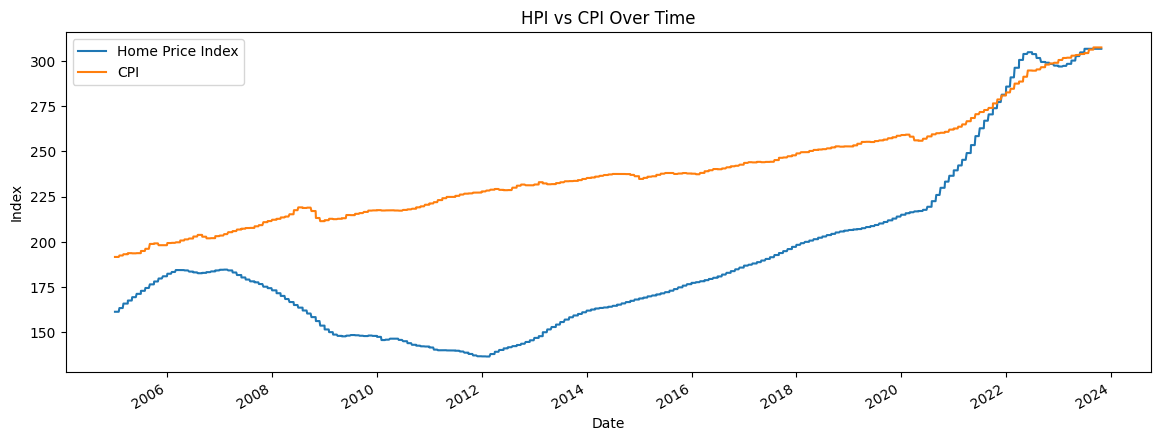

In [146]:
df[['Home Price Index', 'CPI']].plot(figsize=(14,5), title='HPI vs CPI Over Time')
plt.ylabel("Index")
plt.show()

This Divergence is a strong indication towards the fact that the 2008 inflation and crash didn't affect the consumption wave but it hit the housing market which saw steep decline but with growing CPI it made a comeback and was not affected by the covid crisis

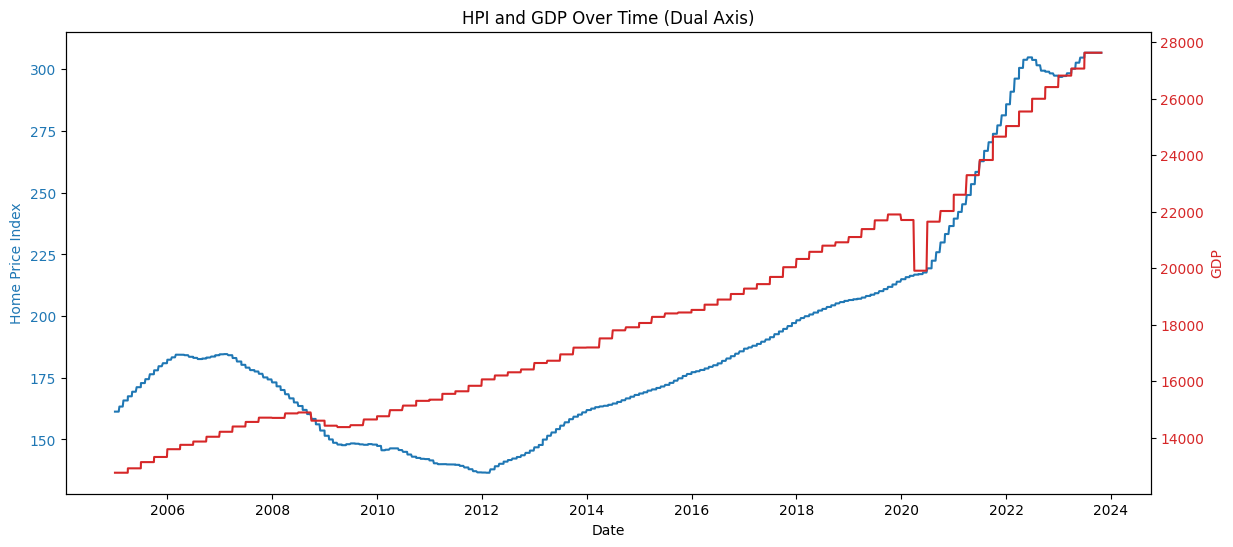

In [147]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price Index', color='tab:blue')
ax1.plot(df.index, df['Home Price Index'], color='tab:blue', label='HPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('GDP', color='tab:red')
ax2.plot(df.index, df['GDP'], color='tab:red', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("HPI and GDP Over Time (Dual Axis)")
plt.show()

This graph tells us that HPI and GDP go hand in hand and have observed a very similar pattern over time

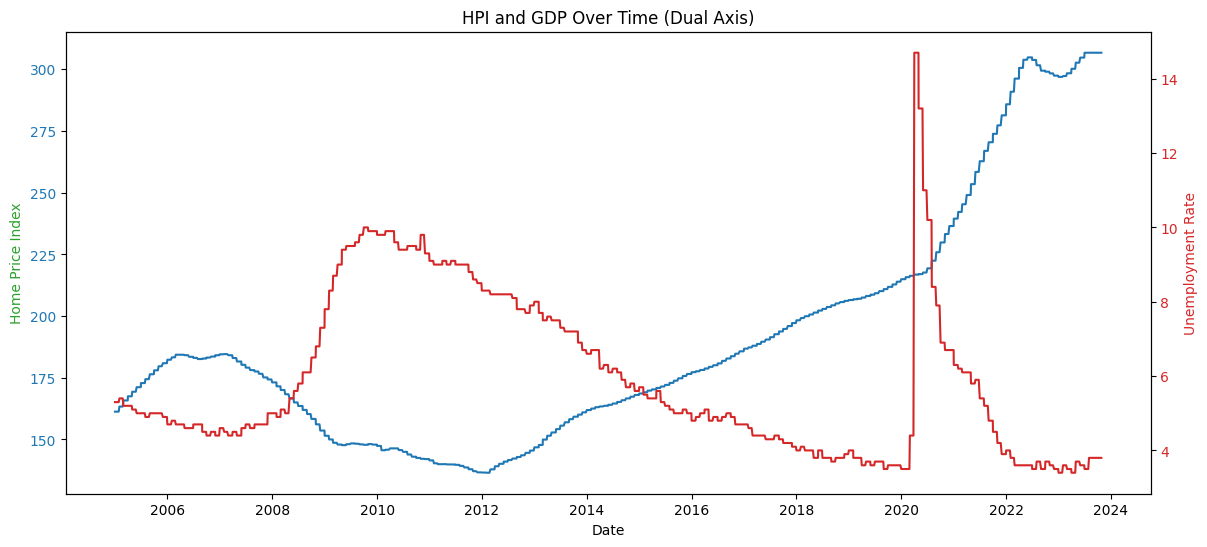

In [148]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price Index', color='tab:green')
ax1.plot(df.index, df['Home Price Index'], color='tab:blue', label='HPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('Unemployment Rate', color='tab:red')
ax2.plot(df.index, df['Unemployment Rate'], color='tab:red', label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title("HPI and GDP Over Time (Dual Axis)")
plt.show()

The Graph clearly indicates that whenever Unemployments have risen HPI has significantly dropped.

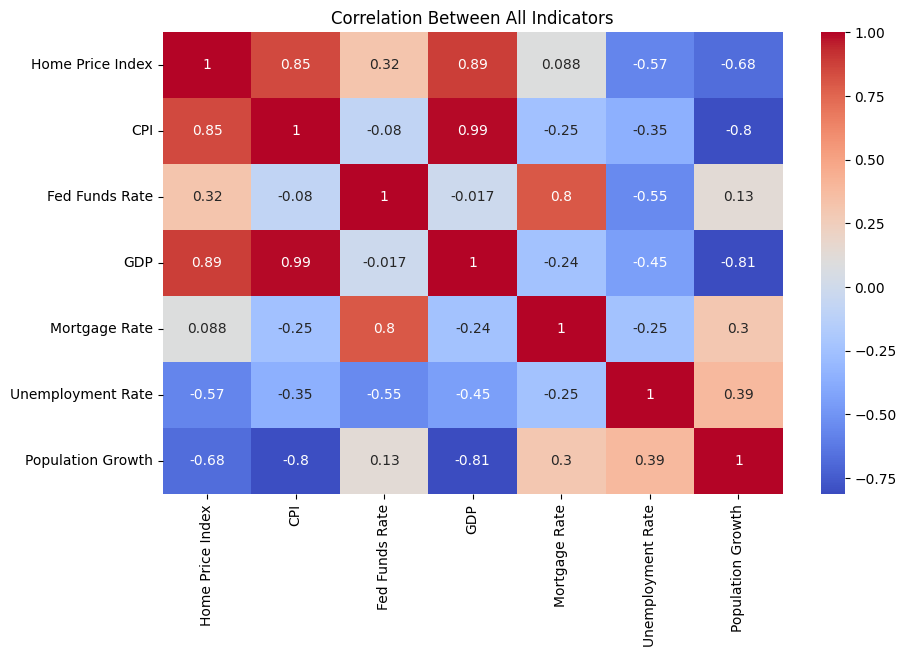

In [149]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between All Indicators")
plt.show()

This tells us that HPI is highly influenced by factors like CPI,GDP,Unemployment Rate and Population Growth

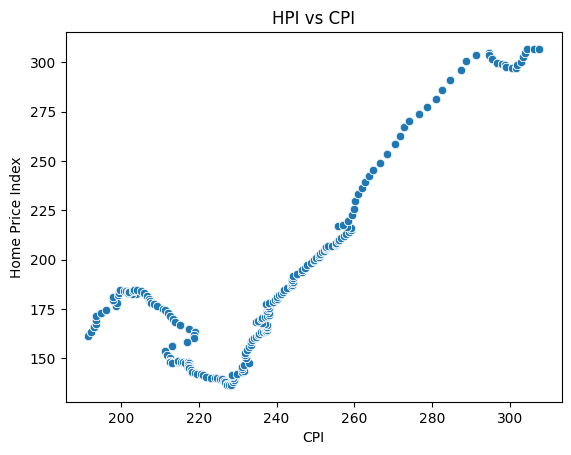

In [150]:
sns.scatterplot(x='CPI', y='Home Price Index', data=df)
plt.title("HPI vs CPI")
plt.show()

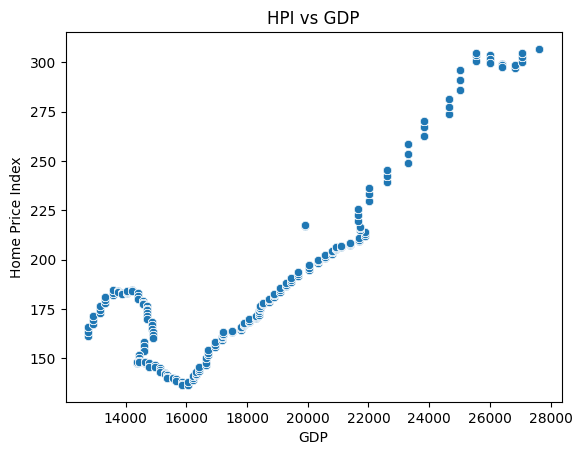

In [151]:
sns.scatterplot(x='GDP', y='Home Price Index', data=df)
plt.title("HPI vs GDP")
plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1177 entries, 2005-01-01 to 2023-10-26
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Home Price Index   1177 non-null   float64
 1   CPI                1177 non-null   float64
 2   Fed Funds Rate     1177 non-null   float64
 3   GDP                1177 non-null   float64
 4   Mortgage Rate      1177 non-null   float64
 5   Unemployment Rate  1177 non-null   float64
 6   Population Growth  1177 non-null   float64
dtypes: float64(7)
memory usage: 73.6 KB


In [153]:
df.head()

,Home Price Index,CPI,Fed Funds Rate,GDP,Mortgage Rate,Unemployment Rate,Population Growth
Date,,,,,,,
2005-01-01,161.288,191.6,2.28,12767.286,5.77,5.3,0.921713
2005-01-06,161.288,191.6,2.28,12767.286,5.77,5.3,0.921713
2005-01-13,161.288,191.6,2.28,12767.286,5.74,5.3,0.921713
2005-01-20,161.288,191.6,2.28,12767.286,5.67,5.3,0.921713
2005-01-27,161.288,191.6,2.28,12767.286,5.66,5.3,0.921713


In [154]:
df.isnull().sum()

Home Price Index     0
CPI                  0
Fed Funds Rate       0
GDP                  0
Mortgage Rate        0
Unemployment Rate    0
Population Growth    0
dtype: int64

In [155]:
df.dropna()

,Home Price Index,CPI,Fed Funds Rate,GDP,Mortgage Rate,Unemployment Rate,Population Growth
Date,,,,,,,
2005-01-01,161.288,191.600,2.28,12767.286,5.77,5.3,0.921713
2005-01-06,161.288,191.600,2.28,12767.286,5.77,5.3,0.921713
2005-01-13,161.288,191.600,2.28,12767.286,5.74,5.3,0.921713
2005-01-20,161.288,191.600,2.28,12767.286,5.67,5.3,0.921713
2005-01-27,161.288,191.600,2.28,12767.286,5.66,5.3,0.921713
...,...,...,...,...,...,...,...
2023-09-28,306.720,307.481,5.33,27623.543,7.31,3.8,0.377565
2023-10-05,306.720,307.481,5.33,27623.543,7.49,3.8,0.377565
2023-10-12,306.720,307.481,5.33,27623.543,7.57,3.8,0.377565


In [156]:
y = df['Home Price Index']
X = df.drop(columns=['Home Price Index'])

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [158]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [159]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression R²: {r2}")
print(f"RMSE: {rmse}")

Linear Regression R²: -1.8120712090981765
RMSE: 56.24413299680654


Observing that Linear Regression results in a -ve R² and unavried RMSE, we add a lag shift to the HPI value and then perform Ridge regression on Top features

In [160]:
df['HPI_lag1'] = df['Home Price Index'].shift(1)

In [161]:
df = df.dropna()

In [162]:
df

,Home Price Index,CPI,Fed Funds Rate,GDP,Mortgage Rate,Unemployment Rate,Population Growth,HPI_lag1
Date,,,,,,,,
2005-01-06,161.288,191.600,2.28,12767.286,5.77,5.3,0.921713,161.288
2005-01-13,161.288,191.600,2.28,12767.286,5.74,5.3,0.921713,161.288
2005-01-20,161.288,191.600,2.28,12767.286,5.67,5.3,0.921713,161.288
2005-01-27,161.288,191.600,2.28,12767.286,5.66,5.3,0.921713,161.288
2005-02-01,163.344,192.400,2.50,12767.286,5.66,5.4,0.921713,161.288
...,...,...,...,...,...,...,...,...
2023-09-28,306.720,307.481,5.33,27623.543,7.31,3.8,0.377565,306.720
2023-10-05,306.720,307.481,5.33,27623.543,7.49,3.8,0.377565,306.720
2023-10-12,306.720,307.481,5.33,27623.543,7.57,3.8,0.377565,306.720


In [163]:
features = ['GDP', 'CPI', 'Unemployment Rate', 'Population Growth', 'HPI_lag1']
X = df[features]
y = df['Home Price Index']

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

In [165]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [166]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Final Ridge R²: {r2}")
print(f"Final Ridge RMSE: {rmse}")

Final Ridge R²: 0.9974575738440961
Final Ridge RMSE: 1.6911738062105566


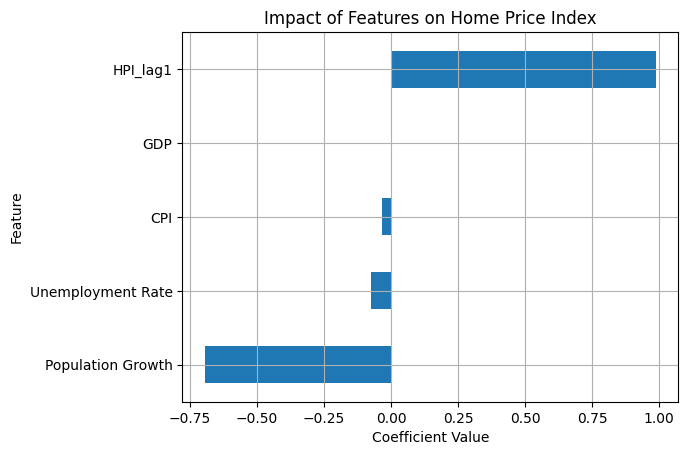

In [167]:
coefficients = pd.Series(model.coef_, index=features)
coefficients.sort_values().plot(kind='barh', title="Impact of Features on Home Price Index")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

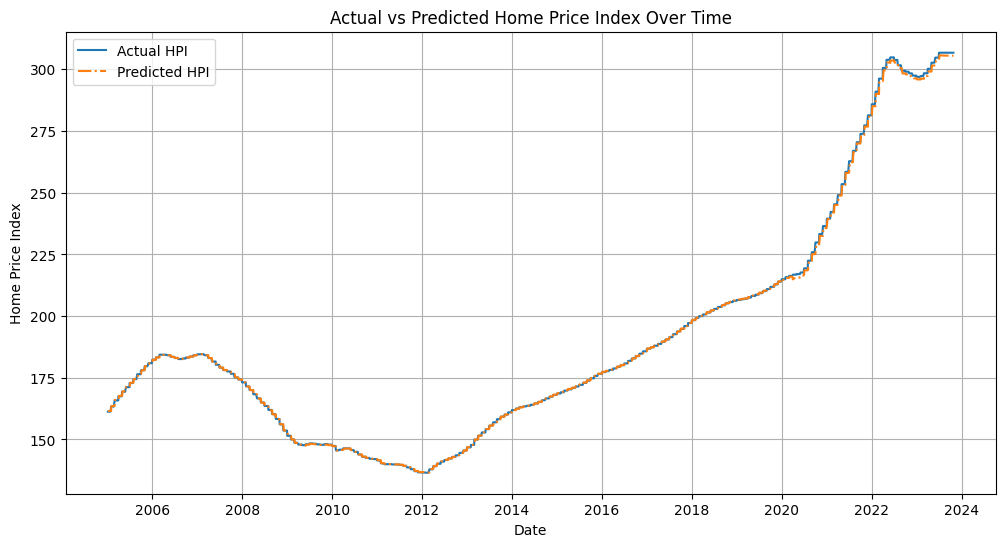

In [171]:
df.loc[:, 'Predicted HPI'] = model.predict(X)

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Home Price Index'], label='Actual HPI')
plt.plot(df.index, df['Predicted HPI'], label='Predicted HPI', linestyle='dashdot')
plt.title("Actual vs Predicted Home Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("Home Price Index")
plt.legend()
plt.grid(True)
plt.show()

HPI is heavily influenced by its own past values (HPI_lag1).

Economic indicators like GDP and CPI have strong positive contributions.

Unemployment and population growth show inverse relationships with HPI.

The model explains the historical trend extremely well (R² = 0.997).